In [1]:
import csv
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import sqlite3

In [2]:
result = [[], [], [],[], [], [],[]]
toto=[]
def print_stock_price(page_num):
    for n in range(page_num):
        url = 'https://finance.naver.com/item/sise_day.nhn?code=069960&page='+str(n+1)
        headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 Edg/87.0.664.66"}
        r = requests.get(url,headers=headers)
        html = r.content
        soup = BeautifulSoup(html, 'html.parser')
        tr = soup.select('table >tr')
        for i in range(1, len(tr)-1):
            if tr[i].select('td')[0].text.strip():
                a=tr[i].select('td')[0].text.replace('.','-').strip()
                a1=tr[i].select('td')[0].text.replace('.','').strip()
                b=tr[i].select('td')[1].text.replace(',','').strip()
                c=tr[i].select('td')[3].text.replace(',','').strip()
                d=tr[i].select('td')[4].text.replace(',','').strip()
                e=tr[i].select('td')[5].text.replace(',','').strip()
                f=tr[i].select('td')[6].text.replace(',','').strip()
                result[0].append(a)
                result[1].append(int(a1))
                result[2].append(int(b))
                result[3].append(int(c))
                result[4].append(int(d))
                result[5].append(int(e))
                result[6].append(int(f))
                toto.append([a,int(a1),int(b),int(c),int(d),int(e),int(f)])
print_stock_price(452)
print('현대백화점')
print(len(result[0]))
print(toto)
# for i in range(len(result[0])):
#     print(result[0][i],result[1][i],result[2][i],result[3][i],result[4][i],result[5][i],result[6][i])

현대백화점
4514
[['2021-02-25', 20210225, 82800, 81700, 82900, 81000, 124582], ['2021-02-24', 20210224, 80500, 84200, 84400, 80400, 348782], ['2021-02-23', 20210223, 83300, 81200, 83900, 80500, 444321], ['2021-02-22', 20210222, 80900, 81100, 82100, 80400, 208181], ['2021-02-19', 20210219, 80700, 80700, 81200, 78700, 214284], ['2021-02-18', 20210218, 80500, 80500, 82200, 80200, 267695], ['2021-02-17', 20210217, 80500, 81700, 81700, 80100, 154759], ['2021-02-16', 20210216, 81400, 81800, 82100, 80800, 189183], ['2021-02-15', 20210215, 81300, 83300, 83300, 81000, 283484], ['2021-02-10', 20210210, 81900, 82700, 83200, 80900, 171296], ['2021-02-09', 20210209, 82700, 84700, 84800, 82600, 277616], ['2021-02-08', 20210208, 84300, 83000, 85000, 81800, 567690], ['2021-02-05', 20210205, 81800, 81300, 82000, 79300, 376046], ['2021-02-04', 20210204, 78300, 79800, 79800, 77800, 162492], ['2021-02-03', 20210203, 79500, 80000, 80300, 78700, 130170], ['2021-02-02', 20210202, 79000, 78800, 80200, 77500, 15672

In [3]:
c ={'날짜':result[0],'키값':result[1],'종가':result[2],'시가':result[3],'고가':result[4],'저가':result[5],'거래량':result[6]}

In [4]:
hyendei=pd.DataFrame(c)
hyendei=hyendei.drop_duplicates(['날짜'])
hyendei

,날짜,키값,종가,시가,고가,저가,거래량
0,2021-02-25,20210225,82800,81700,82900,81000,124582
1,2021-02-24,20210224,80500,84200,84400,80400,348782
2,2021-02-23,20210223,83300,81200,83900,80500,444321
3,2021-02-22,20210222,80900,81100,82100,80400,208181
4,2021-02-19,20210219,80700,80700,81200,78700,214284
...,...,...,...,...,...,...,...
4509,2002-11-29,20021129,29700,28550,29700,28550,528838
4510,2002-11-28,20021128,28650,28650,29200,28100,528764
4511,2002-11-27,20021127,28650,28700,28950,27900,494132
4512,2002-11-26,20021126,29000,28800,29500,28100,628567


In [7]:
yesterday=[]
for i in range(0,4513):
    yesterday.append(hyendei['종가'][i+1])
yesterday.append(0)
hyendei['전날종가'] = yesterday
print(yesterday)
len(yesterday)

[80500, 83300, 80900, 80700, 80500, 80500, 81400, 81300, 81900, 82700, 84300, 81800, 78300, 79500, 79000, 78500, 78200, 79600, 81000, 82300, 84000, 83100, 80600, 79700, 79600, 77100, 79000, 80000, 80500, 80400, 77700, 79000, 74700, 73000, 74000, 72000, 71400, 70800, 70700, 70500, 69700, 70100, 70400, 70600, 70300, 70800, 71000, 71000, 73300, 72700, 73100, 71700, 72100, 74600, 75200, 75200, 71300, 70900, 70900, 70700, 71400, 71800, 71400, 71900, 71300, 70400, 72400, 70200, 69900, 70500, 68600, 66600, 63500, 62700, 61600, 60900, 62100, 61500, 59200, 61000, 62400, 61300, 64500, 66300, 67800, 67500, 65900, 66400, 61900, 59100, 59400, 60800, 59100, 57100, 57000, 57000, 56900, 56300, 55600, 53900, 53300, 54800, 55700, 57200, 56800, 57000, 57700, 57400, 57200, 56300, 56400, 56000, 56400, 56300, 55800, 56500, 56500, 54900, 53700, 55700, 54600, 56600, 57400, 56500, 57700, 58300, 60300, 59900, 63400, 62700, 64800, 62500, 61600, 60200, 59600, 58900, 59400, 58500, 59700, 60900, 59300, 59600, 59500

4514

In [8]:
hyendei['전일비'] = hyendei['종가']-hyendei['전날종가']
hyendei

,날짜,키값,종가,시가,고가,저가,거래량,전날종가,전일비
0,2021-02-25,20210225,82800,81700,82900,81000,124582,80500,2300
1,2021-02-24,20210224,80500,84200,84400,80400,348782,83300,-2800
2,2021-02-23,20210223,83300,81200,83900,80500,444321,80900,2400
3,2021-02-22,20210222,80900,81100,82100,80400,208181,80700,200
4,2021-02-19,20210219,80700,80700,81200,78700,214284,80500,200
...,...,...,...,...,...,...,...,...,...
4509,2002-11-29,20021129,29700,28550,29700,28550,528838,28650,1050
4510,2002-11-28,20021128,28650,28650,29200,28100,528764,28650,0
4511,2002-11-27,20021127,28650,28700,28950,27900,494132,29000,-350
4512,2002-11-26,20021126,29000,28800,29500,28100,628567,28600,400


In [9]:
a=hyendei['전일비'][hyendei['전일비']>0]
print('내가 천재였다면 :'+str(sum(a)))
b=hyendei['전일비']
print('내가 가지고만 있었다면 :'+str(sum(b)))

내가 천재였다면 :3879250
내가 가지고만 있었다면 :82800


In [22]:
dbname="hyendei.db"
conn =sqlite3.connect(dbname)
cur=conn.cursor()
sql ="select * from hyendei"
resul=cur.execute(sql)
print(resul)
cur.close()
conn.close()

In [11]:
po=[[],[],[],[]]
oo=[]
for j in range(0,200):
    url = 'https://finance.naver.com/item/frgn.nhn?code=069960&page='+str(j+1)
    headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36 Edg/87.0.664.66"}
    r = requests.get(url,headers=headers)
    html = r.content
    soup = BeautifulSoup(html, 'html.parser')
    tr = soup.select('table >tr')
    for i in range(5,34):#len(tr)):
        if tr[i].select('td')[0].text.strip():
            a=tr[i].select('td')[0].text.replace('.','-').strip()
            b=tr[i].select('td')[4].text.replace(',','').strip()
            c=tr[i].select('td')[5].text.replace('+','').strip()
            c=c.replace(',','')
            d=tr[i].select('td')[6].text.replace('+','').strip()
            d=d.replace(',','')
            po[0].append(a)
            po[1].append(int(b))
            po[2].append(int(c))
            po[3].append(int(d))
            oo.append([a,int(b),int(c),int(d)])

In [12]:
print(oo)

[['2021-02-24', 348782, 28377, -64078], ['2021-02-23', 444321, 45536, 77761], ['2021-02-22', 208181, 1767, -14744], ['2021-02-19', 214284, -14140, -19038], ['2021-02-18', 267695, 6497, -9417], ['2021-02-17', 154759, 3330, -7624], ['2021-02-16', 189183, -22365, -9951], ['2021-02-15', 283484, 1138, -12515], ['2021-02-10', 171296, -16928, -8945], ['2021-02-09', 277616, -1963, -24487], ['2021-02-08', 567690, 63921, 101534], ['2021-02-05', 376046, 78687, 49010], ['2021-02-04', 162492, -65259, 1536], ['2021-02-03', 130170, -11305, 8806], ['2021-02-02', 156720, 5827, 8160], ['2021-02-01', 215171, -36888, 3046], ['2021-01-29', 281666, -26330, -23514], ['2021-01-28', 180471, -21003, -3754], ['2021-01-27', 202083, -55796, -326], ['2021-01-26', 227526, -34956, -24590], ['2021-01-25', 311236, -72368, -27516], ['2021-01-22', 382019, -163, 33262], ['2021-01-21', 181915, -7620, 8780], ['2021-01-20', 153276, -33678, 9503], ['2021-01-19', 194881, 1853, 35092], ['2021-01-18', 240787, -28472, 2141], ['20

In [13]:
poc ={'날짜':po[0],'총거래량':po[1],'기관':po[2],'외국인':po[3]}

In [14]:
hyendei_cho=pd.DataFrame(poc)
hyendei_cho

,날짜,총거래량,기관,외국인
0,2021-02-24,348782,28377,-64078
1,2021-02-23,444321,45536,77761
2,2021-02-22,208181,1767,-14744
3,2021-02-19,214284,-14140,-19038
4,2021-02-18,267695,6497,-9417
...,...,...,...,...
3988,2005-01-07,91600,-14790,-34900
3989,2005-01-06,113929,-20566,19220
3990,2005-01-05,108890,44170,12550
3991,2005-01-04,74824,-31620,15590


In [16]:
here=[]
for i in range(len(hyendei_cho['날짜'])):
    if hyendei_cho['기관'][i] > 0:
        if hyendei_cho['외국인'][i] > 0:
            here.append(hyendei_cho['총거래량'][i]-hyendei_cho['기관'][i]-hyendei_cho['외국인'][i])
        else :
            here.append(hyendei_cho['총거래량'][i]-hyendei_cho['기관'][i])
    else :
        if hyendei_cho['외국인'][i] > 0 :
            here.append(hyendei_cho['총거래량'][i]-hyendei_cho['외국인'][i])
        else :
            here.append(hyendei_cho['총거래량'][i])

In [17]:
hyendei_cho['개인']=here
print(hyendei_cho)

              날짜    총거래량     기관    외국인      개인
0     2021-02-24  348782  28377 -64078  320405
1     2021-02-23  444321  45536  77761  321024
2     2021-02-22  208181   1767 -14744  206414
3     2021-02-19  214284 -14140 -19038  214284
4     2021-02-18  267695   6497  -9417  261198
...          ...     ...    ...    ...     ...
3988  2005-01-07   91600 -14790 -34900   91600
3989  2005-01-06  113929 -20566  19220   94709
3990  2005-01-05  108890  44170  12550   52170
3991  2005-01-04   74824 -31620  15590   59234
3992  2005-01-03   74311   3280  15530   55501

[3993 rows x 5 columns]


In [18]:
hyendei_all = pd.merge(hyendei, hyendei_cho)

In [19]:
hyendei_all

,날짜,키값,종가,시가,고가,저가,거래량,전날종가,전일비,총거래량,기관,외국인,개인
0,2021-02-24,20210224,80500,84200,84400,80400,348782,83300,-2800,348782,28377,-64078,320405
1,2021-02-23,20210223,83300,81200,83900,80500,444321,80900,2400,444321,45536,77761,321024
2,2021-02-22,20210222,80900,81100,82100,80400,208181,80700,200,208181,1767,-14744,206414
3,2021-02-19,20210219,80700,80700,81200,78700,214284,80500,200,214284,-14140,-19038,214284
4,2021-02-18,20210218,80500,80500,82200,80200,267695,80500,0,267695,6497,-9417,261198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988,2005-01-07,20050107,33000,34300,34800,32750,91600,34400,-1400,91600,-14790,-34900,91600
3989,2005-01-06,20050106,34400,34800,35300,34400,113929,35000,-600,113929,-20566,19220,94709
3990,2005-01-05,20050105,35000,33450,35000,33450,108890,33600,1400,108890,44170,12550,52170
3991,2005-01-04,20050104,33600,33850,34050,33300,74824,33550,50,74824,-31620,15590,59234


In [20]:
def dataprs(d=[]):
    dbname="hyendei.db"
    with sqlite3.connect(dbname) as conn:
        cur = conn.cursor()
        if d:
            sql ="insert into hyendei (sday,skey,sclose,sopen,shigh,slow,svol,syest,splus,sallvol,scom,sfor,scoms) values (?,?,?,?,?,?,?,?,?,?,?,?,?)"
            cur.execute(sql,d)
            print('입력완료')
        else:
            sql='select * from hyendei'
            result3 = cur.execute(sql).fetchall()
            print(result3)
    conn.close()

In [23]:
for i in range(len(hyendei_all['날짜'])):
    dataprs(hyendei_all.values[i].tolist())

입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료


입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료
입력완료


In [2]:
def getDB():
    dbname='hyendei.db'
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select * from hyendei order by skey asc'
        qry=cur.execute(sql)
        desc=[row[0] for row in qry.description]
        data=qry.fetchall()
    return((desc,data))

In [3]:
res=getDB()
res[0]

['sidx',
 'skey',
 'sday',
 'sclose',
 'sopen',
 'shigh',
 'slow',
 'svol',
 'syest',
 'splus',
 'sallvol',
 'scom',
 'sfor',
 'scoms']

In [4]:
df =pd.DataFrame(data=res[1],columns=res[0]).set_index('sidx')
df.head()

,skey,sday,sclose,sopen,shigh,slow,svol,syest,splus,sallvol,scom,sfor,scoms
sidx,,,,,,,,,,,,,
3993,20050103,2005-01-03,33550,33850,34400,33400,74311,33800,-250,74311,3280,15530,55501
3992,20050104,2005-01-04,33600,33850,34050,33300,74824,33550,50,74824,-31620,15590,59234
3991,20050105,2005-01-05,35000,33450,35000,33450,108890,33600,1400,108890,44170,12550,52170
3990,20050106,2005-01-06,34400,34800,35300,34400,113929,35000,-600,113929,-20566,19220,94709
3989,20050107,2005-01-07,33000,34300,34800,32750,91600,34400,-1400,91600,-14790,-34900,91600


<AxesSubplot:xlabel='sday'>

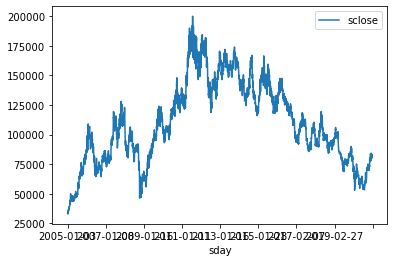

In [5]:
df.plot(x='sday',y='sclose')

In [6]:
df['preday']=df['sclose'].shift(1)
df.head()

,skey,sday,sclose,sopen,shigh,slow,svol,syest,splus,sallvol,scom,sfor,scoms,preday
sidx,,,,,,,,,,,,,,
3993,20050103,2005-01-03,33550,33850,34400,33400,74311,33800,-250,74311,3280,15530,55501,NaN
3992,20050104,2005-01-04,33600,33850,34050,33300,74824,33550,50,74824,-31620,15590,59234,33550.0
3991,20050105,2005-01-05,35000,33450,35000,33450,108890,33600,1400,108890,44170,12550,52170,33600.0
3990,20050106,2005-01-06,34400,34800,35300,34400,113929,35000,-600,113929,-20566,19220,94709,35000.0
3989,20050107,2005-01-07,33000,34300,34800,32750,91600,34400,-1400,91600,-14790,-34900,91600,34400.0


In [7]:
cdf=df[['sday','sclose']].copy()
cdf.head()

,sday,sclose
sidx,,
3993,2005-01-03,33550
3992,2005-01-04,33600
3991,2005-01-05,35000
3990,2005-01-06,34400
3989,2005-01-07,33000


In [8]:
cdf['preday']=cdf['sclose'].shift(1)
cdf=cdf.fillna(0)
cdf.head()

,sday,sclose,preday
sidx,,,
3993,2005-01-03,33550,0.0
3992,2005-01-04,33600,33550.0
3991,2005-01-05,35000,33600.0
3990,2005-01-06,34400,35000.0
3989,2005-01-07,33000,34400.0


In [9]:
cdf.loc[890,'sclose']>cdf.loc[890,'preday']

False

In [10]:
cdf['updown']=(df['sclose']>df['preday']).astype(int)
cdf.head()

,sday,sclose,preday,updown
sidx,,,,
3993,2005-01-03,33550,0.0,0
3992,2005-01-04,33600,33550.0,1
3991,2005-01-05,35000,33600.0,1
3990,2005-01-06,34400,35000.0,0
3989,2005-01-07,33000,34400.0,0


In [11]:
cdf['preupdown']=cdf['updown'].shift(1)
cdf=cdf.fillna(0)
cdf.head()

,sday,sclose,preday,updown,preupdown
sidx,,,,,
3993,2005-01-03,33550,0.0,0,0.0
3992,2005-01-04,33600,33550.0,1,0.0
3991,2005-01-05,35000,33600.0,1,1.0
3990,2005-01-06,34400,35000.0,0,1.0
3989,2005-01-07,33000,34400.0,0,0.0


In [12]:
cdf['sellpos']= np.where(cdf['updown']>cdf['preupdown'],1,0)+np.where(cdf['updown']<cdf['preupdown'],-1,0)

cdf.head()

,sday,sclose,preday,updown,preupdown,sellpos
sidx,,,,,,
3993,2005-01-03,33550,0.0,0,0.0,0
3992,2005-01-04,33600,33550.0,1,0.0,1
3991,2005-01-05,35000,33600.0,1,1.0,0
3990,2005-01-06,34400,35000.0,0,1.0,-1
3989,2005-01-07,33000,34400.0,0,0.0,0


In [13]:
def finprs(df):
    fdf = df.copy()
    precre=33550 #이전 주식 잔고
    predeb =0 # 이전 통장 잔고
    preinstock = 1
    res=[]
    for idx,row in fdf.iterrows():
        canbuy=predeb//row['sclose'] # 살 수 있는 주식의 갯수
        if (row['sellpos']==1 and preinstock == 0) : 
            if canbuy>0:
                #사라는 신호가 왔고 주식잔고는 없을 때, 통장에 잔고(주식을 살만한)가 있는지?
                #산다
                cre = precre + canbuy*row['sclose']
                deb = precre - canbuy*row['sclose']
                instock = canbuy
            else:#돈이없어서 아무일 없다
                instock=preinstock
                cre =precre
                deb =predeb
                
        elif(row['sellpos']==-1 and preinstock==1):
                #팔라는 신호가 왔고 주식이 있다 ---> 판다
            cre = 0
            deb =predeb+row['sclose']*preinstock
            instock = 0
        else:
                #sellpos :1 prestock :1, sellpos: -1 prestock:0 ,no debt
            instock =preinstock
            cre =precre
            deb =predeb
        fdf.loc[idx,'hasstock']=instock
        fdf.loc[idx,'debt']=deb
        fdf.loc[idx,'credit']=cre
            
    return fdf
rdf =finprs(cdf)
rdf.tail(10)

,sday,sclose,preday,updown,preupdown,sellpos,hasstock,debt,credit
sidx,,,,,,,,,
10,2021-02-09,82700,84300.0,0,1.0,-1,0.0,82700.0,0.0
9,2021-02-10,81900,82700.0,0,0.0,0,1.0,0.0,33550.0
8,2021-02-15,81300,81900.0,0,0.0,0,1.0,0.0,33550.0
7,2021-02-16,81400,81300.0,1,0.0,1,1.0,0.0,33550.0
6,2021-02-17,80500,81400.0,0,1.0,-1,0.0,80500.0,0.0
5,2021-02-18,80500,80500.0,0,0.0,0,1.0,0.0,33550.0
4,2021-02-19,80700,80500.0,1,0.0,1,1.0,0.0,33550.0
3,2021-02-22,80900,80700.0,1,1.0,0,1.0,0.0,33550.0
2,2021-02-23,83300,80900.0,1,1.0,0,1.0,0.0,33550.0


In [14]:
rdf=finprs(cdf)
rdf[:10]

,sday,sclose,preday,updown,preupdown,sellpos,hasstock,debt,credit
sidx,,,,,,,,,
3993,2005-01-03,33550,0.0,0,0.0,0,1.0,0.0,33550.0
3992,2005-01-04,33600,33550.0,1,0.0,1,1.0,0.0,33550.0
3991,2005-01-05,35000,33600.0,1,1.0,0,1.0,0.0,33550.0
3990,2005-01-06,34400,35000.0,0,1.0,-1,0.0,34400.0,0.0
3989,2005-01-07,33000,34400.0,0,0.0,0,1.0,0.0,33550.0
3988,2005-01-10,34000,33000.0,1,0.0,1,1.0,0.0,33550.0
3987,2005-01-11,33950,34000.0,0,1.0,-1,0.0,33950.0,0.0
3986,2005-01-12,34000,33950.0,1,0.0,1,1.0,0.0,33550.0
3985,2005-01-13,33900,34000.0,0,1.0,-1,0.0,33900.0,0.0


In [15]:
cdf['updown']=(cdf['sclose']>cdf['preday']).astype(int)
cdf.head()

,sday,sclose,preday,updown,preupdown,sellpos
sidx,,,,,,
3993,2005-01-03,33550,0.0,1,0.0,0
3992,2005-01-04,33600,33550.0,1,0.0,1
3991,2005-01-05,35000,33600.0,1,1.0,0
3990,2005-01-06,34400,35000.0,0,1.0,-1
3989,2005-01-07,33000,34400.0,0,0.0,0


In [16]:
cdf['preupdown']=cdf['updown'].shift(-1)
cdf=cdf.fillna(0)
cdf.head()

,sday,sclose,preday,updown,preupdown,sellpos
sidx,,,,,,
3993,2005-01-03,33550,0.0,1,1.0,0
3992,2005-01-04,33600,33550.0,1,1.0,1
3991,2005-01-05,35000,33600.0,1,0.0,0
3990,2005-01-06,34400,35000.0,0,0.0,-1
3989,2005-01-07,33000,34400.0,0,1.0,0


In [17]:
cdf['sellpos']= np.where(cdf['updown']<cdf['preupdown'],1,0)+np.where(cdf['updown']>cdf['preupdown'],-1,0)
cdf.head()

,sday,sclose,preday,updown,preupdown,sellpos
sidx,,,,,,
3993,2005-01-03,33550,0.0,1,1.0,0
3992,2005-01-04,33600,33550.0,1,1.0,0
3991,2005-01-05,35000,33600.0,1,0.0,-1
3990,2005-01-06,34400,35000.0,0,0.0,0
3989,2005-01-07,33000,34400.0,0,1.0,1


In [18]:
def finprs(df):
    fdf=df.copy()
    precre=0 # 이전 주식 잔고
    predeb=33550 # 이전 통장 잔고
    prestock=0
    for idx,row in fdf.iterrows():
         # 살수 있는 주식의 갯수
        #사라는 신호가 왔고 주식잔고는 없다  통장에 잔고(주식을 살만한)가 있는지?
        if (row.loc['sellpos']==1 and prestock==0):
            canbuy=predeb//row.loc['sclose']
            if(canbuy>0):
                #산다
                cre=precre+canbuy*row.loc['sclose']
                deb=predeb-canbuy*row.loc['sclose']
                instock=canbuy
            else:# 돈없어서 아무일 없다
                instock=prestock
                cre=precre
                deb=predeb                
        # 팔라는 신호가 왔고 주식은 있다---> 판다
        elif (row.loc['sellpos']==-1 and prestock>0):
            cre=0
            deb=predeb+row.loc['sclose']*prestock
            instock=0
            # sellpos:1 prestock:1,sellpos:-1 prestock:0, no debt
        else:# 조건이 안맞아서 아무일 없다.
            instock=prestock
            cre=precre
            deb=predeb
        fdf.loc[idx,'hasstock']=instock
        fdf.loc[idx,'debt']=deb
        fdf.loc[idx,'credit']=cre
        prestock=instock
        precre=cre
        predeb=deb
    return fdf
rdf=finprs(cdf)
rdf.head(20)

,sday,sclose,preday,updown,preupdown,sellpos,hasstock,debt,credit
sidx,,,,,,,,,
3993,2005-01-03,33550,0.0,1,1.0,0,0.0,33550.0,0.0
3992,2005-01-04,33600,33550.0,1,1.0,0,0.0,33550.0,0.0
3991,2005-01-05,35000,33600.0,1,0.0,-1,0.0,33550.0,0.0
3990,2005-01-06,34400,35000.0,0,0.0,0,0.0,33550.0,0.0
3989,2005-01-07,33000,34400.0,0,1.0,1,1.0,550.0,33000.0
3988,2005-01-10,34000,33000.0,1,0.0,-1,0.0,34550.0,0.0
3987,2005-01-11,33950,34000.0,0,1.0,1,1.0,600.0,33950.0
3986,2005-01-12,34000,33950.0,1,0.0,-1,0.0,34600.0,0.0
3985,2005-01-13,33900,34000.0,0,1.0,1,1.0,700.0,33900.0


<AxesSubplot:xlabel='sday'>

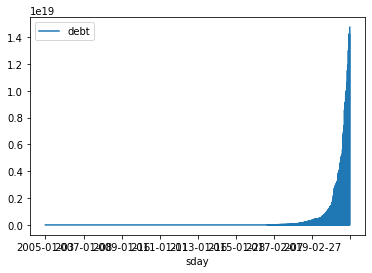

In [19]:
rdf.plot.line(x='sday',y='debt')

<AxesSubplot:xlabel='sday'>

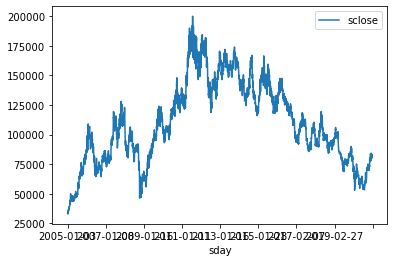

In [20]:
rdf.plot.line(x='sday',y='sclose')

# 이동 평균선
    *일정 기간동안의 평균을 이동하면서 계산하여 이은 선
    *5,20,60,120이 일반적인 기준
    *장단기 크로스 포인트 기반의 투자 기법
    *단기 라인이 장기 라인을 위에서 아래로 뚫었을 때 : 매도 타이밍
    *단기 라인이 장기 라인을 아래서 위로 뚫었을 때 : 매수 타이밍
    *도대체 몇일 선이 단기라인이고 장기라인인 것인가?!

In [21]:
df

,skey,sday,sclose,sopen,shigh,slow,svol,syest,splus,sallvol,scom,sfor,scoms,preday
sidx,,,,,,,,,,,,,,
3993,20050103,2005-01-03,33550,33850,34400,33400,74311,33800,-250,74311,3280,15530,55501,NaN
3992,20050104,2005-01-04,33600,33850,34050,33300,74824,33550,50,74824,-31620,15590,59234,33550.0
3991,20050105,2005-01-05,35000,33450,35000,33450,108890,33600,1400,108890,44170,12550,52170,33600.0
3990,20050106,2005-01-06,34400,34800,35300,34400,113929,35000,-600,113929,-20566,19220,94709,35000.0
3989,20050107,2005-01-07,33000,34300,34800,32750,91600,34400,-1400,91600,-14790,-34900,91600,34400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,20210218,2021-02-18,80500,80500,82200,80200,267695,80500,0,267695,6497,-9417,261198,80500.0
4,20210219,2021-02-19,80700,80700,81200,78700,214284,80500,200,214284,-14140,-19038,214284,80500.0
3,20210222,2021-02-22,80900,81100,82100,80400,208181,80700,200,208181,1767,-14744,206414,80700.0


In [22]:
day5=[]
for i in range(4):
    day5.append(0)
for i in range(3989,0,-1):
    day5.append((df['sclose'][i+4]+df['sclose'][i+3]+df['sclose'][i+2]+df['sclose'][i+1]+df['sclose'][i])/5)

In [23]:
df['day5']=day5

In [24]:
df

,skey,sday,sclose,sopen,shigh,slow,svol,syest,splus,sallvol,scom,sfor,scoms,preday,day5
sidx,,,,,,,,,,,,,,,
3993,20050103,2005-01-03,33550,33850,34400,33400,74311,33800,-250,74311,3280,15530,55501,NaN,0.0
3992,20050104,2005-01-04,33600,33850,34050,33300,74824,33550,50,74824,-31620,15590,59234,33550.0,0.0
3991,20050105,2005-01-05,35000,33450,35000,33450,108890,33600,1400,108890,44170,12550,52170,33600.0,0.0
3990,20050106,2005-01-06,34400,34800,35300,34400,113929,35000,-600,113929,-20566,19220,94709,35000.0,0.0
3989,20050107,2005-01-07,33000,34300,34800,32750,91600,34400,-1400,91600,-14790,-34900,91600,34400.0,33910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,20210218,2021-02-18,80500,80500,82200,80200,267695,80500,0,267695,6497,-9417,261198,80500.0,81120.0
4,20210219,2021-02-19,80700,80700,81200,78700,214284,80500,200,214284,-14140,-19038,214284,80500.0,80880.0
3,20210222,2021-02-22,80900,81100,82100,80400,208181,80700,200,208181,1767,-14744,206414,80700.0,80800.0


<AxesSubplot:xlabel='sday'>

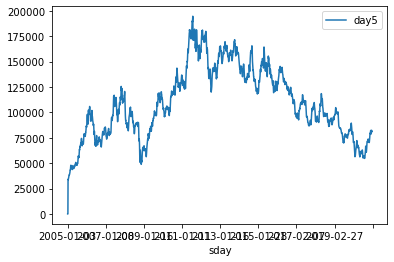

In [25]:
df.plot.line(x='sday',y='day5')

In [59]:
def mvline(src=[],mday=5):
    mvdata=[0 for i in range(mday-1)]
    mvdata
    tot =len(src)
    for i in range(tot-mday+1):
        mvm=np.mean(cdf['sclose'][i:mday+i])
        mvdata.append(mvm)
    return (mvdata)

In [26]:
cdf

,sday,sclose,preday,updown,preupdown,sellpos
sidx,,,,,,
3993,2005-01-03,33550,0.0,1,1.0,0
3992,2005-01-04,33600,33550.0,1,1.0,0
3991,2005-01-05,35000,33600.0,1,0.0,-1
3990,2005-01-06,34400,35000.0,0,0.0,0
3989,2005-01-07,33000,34400.0,0,1.0,1
...,...,...,...,...,...,...
5,2021-02-18,80500,80500.0,0,1.0,1
4,2021-02-19,80700,80500.0,1,1.0,0
3,2021-02-22,80900,80700.0,1,1.0,0


In [60]:
def optmv(cdf):
    cdf['mvshort']=mvline(cdf['sclose'],5)
    cdf['mvlong']=mvline(cdf['sclose'],10)
    cdf['shortpos']=np.where(cdf['mvshort']>cdf['mvlong'],1,-1)*np.where(df['mvlong']==0,0,1)
    redf =cdf.set_index('sday')
    redf['preshortpos']=redf['shortpos'].shift(1)
    rdf=finprs(redf)
    rdf['totval']=rdf['debt']+rdf['credit']
    return rdf
    

In [61]:
rdf=optmv(cdf)

KeyError: 'mvlong'

In [27]:
def mov(mday):
    mvdata=[0 for i in range(mday-1)]
#mvdata
    for i in range(3994-mday,0,-1):
        sum =0
        for j in range(mday):
            sum+=df['sclose'][i+j]
        mvdata.append(sum/mday)
    return mvdata

In [28]:
mov(5)

[0,
 0,
 0,
 0,
 33910.0,
 34000.0,
 34070.0,
 33870.0,
 33770.0,
 34070.0,
 34600.0,
 34970.0,
 35430.0,
 35990.0,
 36390.0,
 36720.0,
 37110.0,
 37590.0,
 38010.0,
 38310.0,
 38210.0,
 38320.0,
 38460.0,
 38580.0,
 38830.0,
 39140.0,
 39350.0,
 39570.0,
 39850.0,
 40680.0,
 41500.0,
 42330.0,
 43130.0,
 43210.0,
 43070.0,
 43180.0,
 43620.0,
 44220.0,
 45520.0,
 46980.0,
 47810.0,
 47910.0,
 47610.0,
 47430.0,
 47020.0,
 47050.0,
 47410.0,
 47500.0,
 47590.0,
 47300.0,
 46580.0,
 45720.0,
 45290.0,
 44830.0,
 44510.0,
 44580.0,
 45030.0,
 45240.0,
 44960.0,
 44670.0,
 44400.0,
 44010.0,
 43740.0,
 43830.0,
 44580.0,
 45440.0,
 46200.0,
 47040.0,
 47600.0,
 47560.0,
 47220.0,
 46700.0,
 46260.0,
 45900.0,
 45570.0,
 45630.0,
 45790.0,
 45450.0,
 45350.0,
 45030.0,
 44690.0,
 44770.0,
 45290.0,
 45490.0,
 45640.0,
 46030.0,
 46090.0,
 46010.0,
 46490.0,
 46850.0,
 46540.0,
 46480.0,
 46760.0,
 46750.0,
 47050.0,
 47730.0,
 48340.0,
 48650.0,
 48830.0,
 49070.0,
 48880.0,
 48900.0,
 488

In [29]:
##내가 한것
mday=20
mvdata=[0 for i in range(mday-1)]
#mvdata
for i in range(3994-mday,0,-1):
    sum =0
    for j in range(mday):
        sum+=df['sclose'][i+j]
    mvdata.append(sum/mday)
mvdata
    #day5.append((df['sclose'][i+4]+df['sclose'][i+3]+df['sclose'][i+2]+df['sclose'][i+1]+df['sclose'][i])/5)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 35670.0,
 35882.5,
 36117.5,
 36337.5,
 36587.5,
 36900.0,
 37167.5,
 37437.5,
 37762.5,
 38107.5,
 38552.5,
 38892.5,
 39277.5,
 39687.5,
 39912.5,
 40222.5,
 40507.5,
 40905.0,
 41345.0,
 41790.0,
 42390.0,
 42907.5,
 43302.5,
 43632.5,
 44002.5,
 44437.5,
 44885.0,
 45317.5,
 45615.0,
 45937.5,
 46092.5,
 46155.0,
 46165.0,
 46155.0,
 46342.5,
 46452.5,
 46505.0,
 46517.5,
 46410.0,
 46202.5,
 45875.0,
 45652.5,
 45542.5,
 45442.5,
 45302.5,
 45265.0,
 45250.0,
 45240.0,
 45327.5,
 45305.0,
 45330.0,
 45410.0,
 45485.0,
 45570.0,
 45572.5,
 45595.0,
 45672.5,
 45675.0,
 45622.5,
 45670.0,
 45685.0,
 45745.0,
 45865.0,
 46010.0,
 46085.0,
 45950.0,
 45892.5,
 45837.5,
 45752.5,
 45807.5,
 45772.5,
 45722.5,
 45782.5,
 45877.5,
 46020.0,
 46142.5,
 46247.5,
 46420.0,
 46677.5,
 46890.0,
 47152.5,
 47295.0,
 47452.5,
 47577.5,
 47772.5,
 48147.5,
 48405.0,
 48615.0,
 48690.0,
 48687.5,
 48715.0,
 48890.0,
 490

In [65]:
##선생님
mday = 5
mvdata2=[0 for i in range(mday-1)]
tot=len(cdf['sclose'])
print('tot',tot)
for i in range(tot-mday+1):
    mvm = np.mean(cdf['sclose'][i:mday+i])
    mvdata2.append(mvm)
print("mvdata2",len(mvdata2))

tot 3993
mvdata2 3993


In [30]:
df['day20']=mov(20)
df['day60']=mov(60)
df['day120']=mov(120)

In [31]:
df

,skey,sday,sclose,sopen,shigh,slow,svol,syest,splus,sallvol,scom,sfor,scoms,preday,day5,day20,day60,day120
sidx,,,,,,,,,,,,,,,,,,
3993,20050103,2005-01-03,33550,33850,34400,33400,74311,33800,-250,74311,3280,15530,55501,NaN,0.0,0.0,0.000000,0.000000
3992,20050104,2005-01-04,33600,33850,34050,33300,74824,33550,50,74824,-31620,15590,59234,33550.0,0.0,0.0,0.000000,0.000000
3991,20050105,2005-01-05,35000,33450,35000,33450,108890,33600,1400,108890,44170,12550,52170,33600.0,0.0,0.0,0.000000,0.000000
3990,20050106,2005-01-06,34400,34800,35300,34400,113929,35000,-600,113929,-20566,19220,94709,35000.0,0.0,0.0,0.000000,0.000000
3989,20050107,2005-01-07,33000,34300,34800,32750,91600,34400,-1400,91600,-14790,-34900,91600,34400.0,33910.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,20210218,2021-02-18,80500,80500,82200,80200,267695,80500,0,267695,6497,-9417,261198,80500.0,81120.0,80910.0,75845.000000,68050.000000
4,20210219,2021-02-19,80700,80700,81200,78700,214284,80500,200,214284,-14140,-19038,214284,80500.0,80880.0,80960.0,75991.666667,68251.666667
3,20210222,2021-02-22,80900,81100,82100,80400,208181,80700,200,208181,1767,-14744,206414,80700.0,80800.0,80975.0,76150.000000,68447.500000


<AxesSubplot:xlabel='sday'>

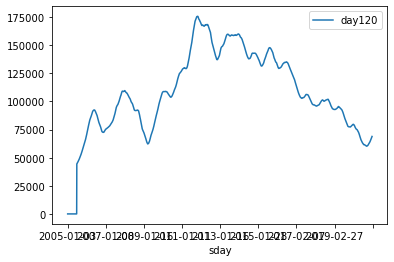

In [32]:
df.plot.line(x='sday',y='day120')

In [33]:
df['shortpos'] = np.where(df['day5']>df['day120'],1,-1)*np.where(df['day120']==0,0,1)
ddf=df.copy()

In [34]:
ddf[120:].corr()

,skey,sclose,sopen,shigh,slow,svol,syest,splus,sallvol,scom,sfor,scoms,preday,day5,day20,day60,day120,shortpos
skey,1.000000,0.015332,0.015917,0.008475,0.023500,-0.077018,0.016646,-0.016867,-0.077018,-0.012273,-0.039648,-0.032661,0.016646,0.017921,0.027458,0.053489,0.098848,-0.214839
sclose,0.015332,1.000000,0.997380,0.998883,0.998761,-0.222583,0.996940,0.034354,-0.222583,0.002111,0.077591,-0.245451,0.996940,0.996557,0.986054,0.957786,0.923823,0.195248
sopen,0.015917,0.997380,1.000000,0.998518,0.998650,-0.225298,0.999319,-0.029550,-0.225298,-0.014447,0.055907,-0.238870,0.999319,0.997699,0.987565,0.959413,0.925179,0.194446
shigh,0.008475,0.998883,0.998518,1.000000,0.998333,-0.212148,0.998069,0.005636,-0.212148,-0.003013,0.067819,-0.232230,0.998069,0.997103,0.986553,0.957662,0.922587,0.199713
slow,0.023500,0.998761,0.998650,0.998333,1.000000,-0.235883,0.998148,0.003077,-0.235883,-0.008739,0.068606,-0.252851,0.998148,0.997188,0.987096,0.959644,0.926589,0.190308
svol,-0.077018,-0.222583,-0.225298,-0.212148,-0.235883,1.000000,-0.227636,0.065663,1.000000,0.108304,-0.095606,0.946121,-0.227636,-0.227543,-0.230039,-0.247802,-0.262369,0.097464
syest,0.016646,0.996940,0.999319,0.998069,0.998148,-0.227636,1.000000,-0.043873,-0.227636,-0.012981,0.049165,-0.240093,1.000000,0.998174,0.987989,0.959818,0.925568,0.194546
splus,-0.016867,0.034354,-0.029550,0.005636,0.003077,0.065663,-0.043873,1.000000,0.065663,0.192942,0.363071,-0.067337,-0.043873,-0.025431,-0.029438,-0.030543,-0.026707,0.008043
sallvol,-0.077018,-0.222583,-0.225298,-0.212148,-0.235883,1.000000,-0.227636,0.065663,1.000000,0.108304,-0.095606,0.946121,-0.227636,-0.227543,-0.230039,-0.247802,-0.262369,0.097464
scom,-0.012273,0.002111,-0.014447,-0.003013,-0.008739,0.108304,-0.012981,0.192942,0.108304,1.000000,-0.503077,0.019212,-0.012981,-0.011825,-0.013776,-0.004021,0.010246,-0.054729


In [35]:
adf=df[['sday','sclose','scom','sfor','scoms','day5','day20','day60','day120']].copy()

In [36]:
adf[120:].corr()

,sclose,scom,sfor,scoms,day5,day20,day60,day120
sclose,1.000000,0.002111,0.077591,-0.245451,0.996557,0.986054,0.957786,0.923823
scom,0.002111,1.000000,-0.503077,0.019212,-0.011825,-0.013776,-0.004021,0.010246
sfor,0.077591,-0.503077,1.000000,-0.237862,0.048163,0.034348,0.019550,0.011697
scoms,-0.245451,0.019212,-0.237862,1.000000,-0.239454,-0.237880,-0.251732,-0.265045
day5,0.996557,-0.011825,0.048163,-0.239454,1.000000,0.991785,0.963979,0.929450
day20,0.986054,-0.013776,0.034348,-0.237880,0.991785,1.000000,0.981103,0.946312
day60,0.957786,-0.004021,0.019550,-0.251732,0.963979,0.981103,1.000000,0.980312
day120,0.923823,0.010246,0.011697,-0.265045,0.929450,0.946312,0.980312,1.000000


In [37]:
#-*- encoding: utf-8 -*-
import pandas as pd
from datetime import datetime
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import folium
from datetime import datetime, timedelta
from pandas import DataFrame
from time import localtime,strftime
import seaborn as sns
import matplotlib.ticker as ticker
colors = sns.color_palette('hls',11)
mpl.rcParams['axes.unicode_minus'] = False

In [38]:
%matplotlib inline 
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

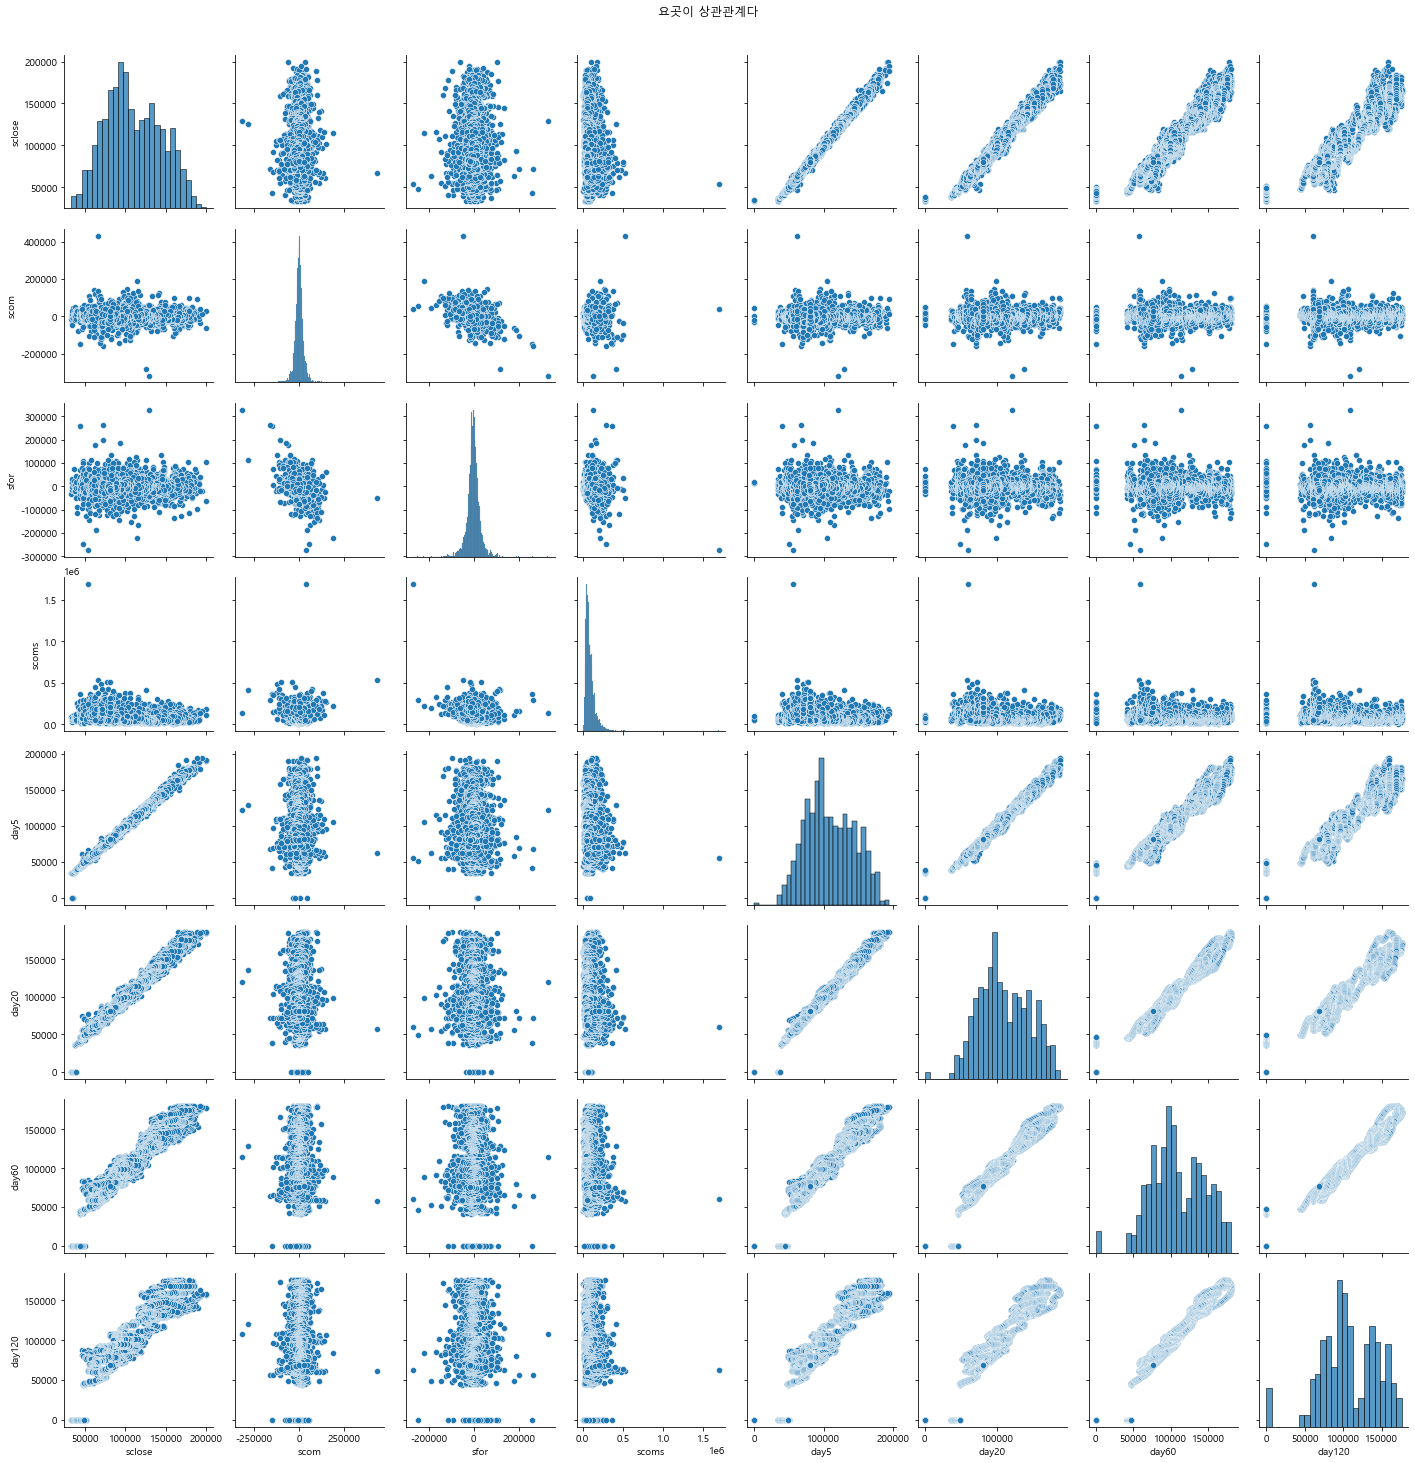

In [39]:
g = sns.pairplot(adf)
g.fig.suptitle("요곳이 상관관계다", y=1.02)
plt.show()

In [40]:
def mvline(src=[],mday=5):
    mvdata=[0 for i in range(mday-1)]
    mvdata
    tot =len(src)
    for i in range(tot-mday+1):
        mvm=np.mean(cdf['sclose'][i:mday+i])
        mvdata.append(mvm)
    return (mvdata)

In [41]:
adf['mvshort']=mvline(adf['sclose'],5)
adf['mvlong']=mvline(adf['sclose'],20)

In [42]:
adf['shortpos']=np.where(adf['mvshort']>adf['mvlong'],1,-1) * np.where(adf['mvlong']==0,0,1)
redf=adf.set_index('sday')
redf.head()

,sclose,scom,sfor,scoms,day5,day20,day60,day120,mvshort,mvlong,shortpos
sday,,,,,,,,,,,
2005-01-03,33550,3280,15530,55501,0.0,0.0,0.0,0.0,0.0,0.0,0
2005-01-04,33600,-31620,15590,59234,0.0,0.0,0.0,0.0,0.0,0.0,0
2005-01-05,35000,44170,12550,52170,0.0,0.0,0.0,0.0,0.0,0.0,0
2005-01-06,34400,-20566,19220,94709,0.0,0.0,0.0,0.0,0.0,0.0,0
2005-01-07,33000,-14790,-34900,91600,33910.0,0.0,0.0,0.0,33910.0,0.0,0


In [43]:
redf['preshortpos']=redf['shortpos'].shift(1)
redf.tail(20)

,sclose,scom,sfor,scoms,day5,day20,day60,day120,mvshort,mvlong,shortpos,preshortpos
sday,,,,,,,,,,,,
2021-01-26,82300,-34956,-24590,227526,81940.0,77480.0,72226.666667,65541.666667,81940.0,77480.0,1,1.0
2021-01-27,81000,-55796,-326,202083,82200.0,77995.0,72590.000000,65719.166667,82200.0,77995.0,1,1.0
2021-01-28,79600,-21003,-3754,180471,82000.0,78435.0,72891.666667,65895.000000,82000.0,78435.0,1,1.0
2021-01-29,78200,-26330,-23514,281666,81020.0,78775.0,73160.000000,66051.666667,81020.0,78775.0,1,1.0
2021-02-01,78500,-36888,3046,212125,79920.0,79100.0,73453.333333,66215.000000,79920.0,79100.0,1,1.0
2021-02-02,79000,5827,8160,142733,79260.0,79350.0,73743.333333,66376.666667,79260.0,79350.0,-1,1.0
2021-02-03,79500,-11305,8806,121364,78960.0,79675.0,74023.333333,66537.500000,78960.0,79675.0,-1,-1.0
2021-02-04,78300,-65259,1536,160956,78700.0,79855.0,74270.000000,66676.666667,78700.0,79855.0,-1,-1.0
2021-02-05,81800,78687,49010,248349,79420.0,79995.0,74523.333333,66837.500000,79420.0,79995.0,-1,-1.0


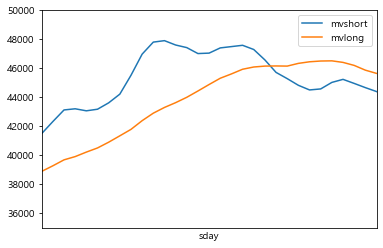

In [44]:
redf[['mvshort','mvlong']].plot()
plt.xlim(30,60)
plt.ylim(35000,50000)
plt.show()

In [45]:
def finprs(df):
    fdf=df.copy()
    precre=0 # 이전 주식 잔고
    predeb=1000000 # 이전 통장 잔고
    prestock=0
    for idx,row in fdf.iterrows():
         # 살수 있는 주식의 갯수
        #단기물 곡선이 하위 포지션에 있다가 장기물 곡선을 크로스 하였다=> 주가 상승 압력이 시작됬다
        # 상승할것으로 보여지니 매수한다.
        if (row.loc['shortpos']==1 and row.loc['shortpos']*row.loc['preshortpos']<0):
            canbuy=predeb//row.loc['sclose']
            if(canbuy>0):
                #산다
                cre=precre+canbuy*row.loc['sclose']
                deb=predeb-canbuy*row.loc['sclose']
                instock=canbuy
            else:# 돈없어서 아무일 없다
                instock=prestock
                cre=precre
                deb=predeb                
        # 단기물 곡선이 상위포지션에 있다가 장기물 곡선을 크로스했다--> 주가의 하방압력이 시작됬다.
        # 하락할것으로 보여지니 매도한다.
        elif (row.loc['shortpos']==-1 and row.loc['shortpos']*row.loc['preshortpos']<0):
            cre=0
            deb=predeb+row.loc['sclose']*prestock
            instock=0
            # sellpos:1 prestock:1,sellpos:-1 prestock:0, no debt
        else:# 조건이 안맞아서 아무일 없다.
            instock=prestock
            cre=precre
            deb=predeb
        fdf.loc[idx,'hasstock']=instock
        fdf.loc[idx,'debt']=deb
        fdf.loc[idx,'credit']=cre
        prestock=instock
        precre=cre
        predeb=deb
    return fdf


In [46]:
rdf=finprs(redf)
rdf.head(30)

,sclose,scom,sfor,scoms,day5,day20,day60,day120,mvshort,mvlong,shortpos,preshortpos,hasstock,debt,credit
sday,,,,,,,,,,,,,,,
2005-01-03,33550,3280,15530,55501,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0.0,1000000.0,0.0
2005-01-04,33600,-31620,15590,59234,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1000000.0,0.0
2005-01-05,35000,44170,12550,52170,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1000000.0,0.0
2005-01-06,34400,-20566,19220,94709,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1000000.0,0.0
2005-01-07,33000,-14790,-34900,91600,33910.0,0.0,0.0,0.0,33910.0,0.0,0,0.0,0.0,1000000.0,0.0
2005-01-10,34000,-4444,12290,29662,34000.0,0.0,0.0,0.0,34000.0,0.0,0,0.0,0.0,1000000.0,0.0
2005-01-11,33950,13330,-14610,48034,34070.0,0.0,0.0,0.0,34070.0,0.0,0,0.0,0.0,1000000.0,0.0
2005-01-12,34000,27290,-17680,53460,33870.0,0.0,0.0,0.0,33870.0,0.0,0,0.0,0.0,1000000.0,0.0
2005-01-13,33900,-8762,-1221,80592,33770.0,0.0,0.0,0.0,33770.0,0.0,0,0.0,0.0,1000000.0,0.0


In [47]:
rdf['totval']=rdf['debt']+rdf['credit']
rdf.tail()

,sclose,scom,sfor,scoms,day5,day20,day60,day120,mvshort,mvlong,shortpos,preshortpos,hasstock,debt,credit,totval
sday,,,,,,,,,,,,,,,,
2021-02-18,80500,6497,-9417,261198,81120.0,80910.0,75845.000000,68050.000000,81120.0,80910.0,1,1.0,9.0,5350.0,758700.0,764050.0
2021-02-19,80700,-14140,-19038,214284,80880.0,80960.0,75991.666667,68251.666667,80880.0,80960.0,-1,1.0,0.0,731650.0,0.0,731650.0
2021-02-22,80900,1767,-14744,206414,80800.0,80975.0,76150.000000,68447.500000,80800.0,80975.0,-1,-1.0,0.0,731650.0,0.0,731650.0
2021-02-23,83300,45536,77761,321024,81180.0,80985.0,76341.666667,68670.000000,81180.0,80985.0,1,-1.0,8.0,65250.0,666400.0,731650.0
2021-02-24,80500,28377,-64078,320405,81180.0,80810.0,76493.333333,68885.833333,81180.0,80810.0,1,1.0,8.0,65250.0,666400.0,731650.0


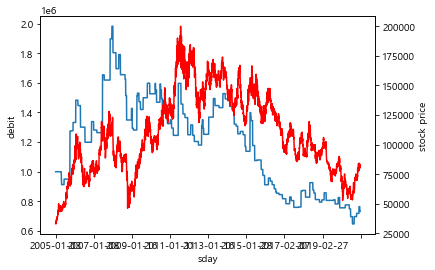

In [48]:
ax1=rdf['totval'].plot()
ax1.set_ylabel('debit')
ax2 = rdf['sclose'].plot(secondary_y=True, color='r')
ax2.set_ylabel('stock price')
plt.show()

In [49]:
edf=df[['sday','sclose','scom','sfor','scoms','day5','day20','day60','day120']].copy()
edf['cscom']=edf['scom'].cumsum()
edf['csfor']=edf['sfor'].cumsum()
edf['cscoms']=edf['scoms'].cumsum()
edf=edf.set_index('sday')

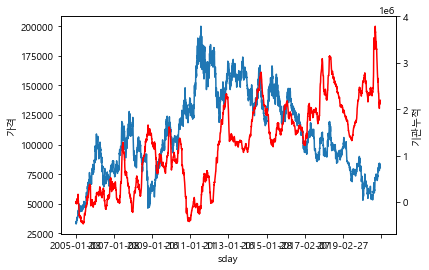

In [50]:
ax1=edf['sclose'].plot()
ax1.set_ylabel('가격')
ax2 = edf['cscom'].plot(secondary_y=True, color='r')
ax2.set_ylabel('기관누적')
plt.show()

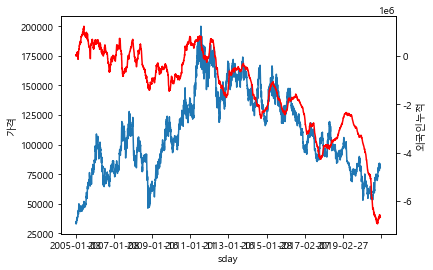

In [51]:
ax1=edf['sclose'].plot()
ax1.set_ylabel('가격')
ax2 = edf['csfor'].plot(secondary_y=True, color='r')
ax2.set_ylabel('외국인누적')
plt.show()

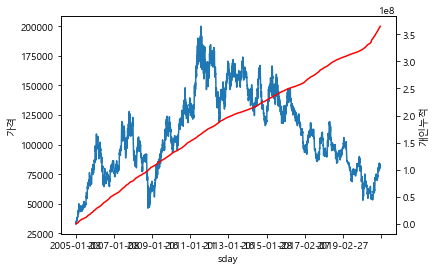

In [52]:
ax1=edf['sclose'].plot()
ax1.set_ylabel('가격')
ax2 = edf['cscoms'].plot(secondary_y=True, color='r')
ax2.set_ylabel('개인누적')
plt.show()